## Algorithmic Trading Strategy

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
## read the data
apple = pd.read_csv("AAPL.csv")
apple

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700
...,...,...,...,...,...,...,...
1505,5/18/2020,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
1506,5/19/2020,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
1507,5/20/2020,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1508,5/21/2020,318.660004,320.890015,315.869995,316.850006,316.850006,25672200


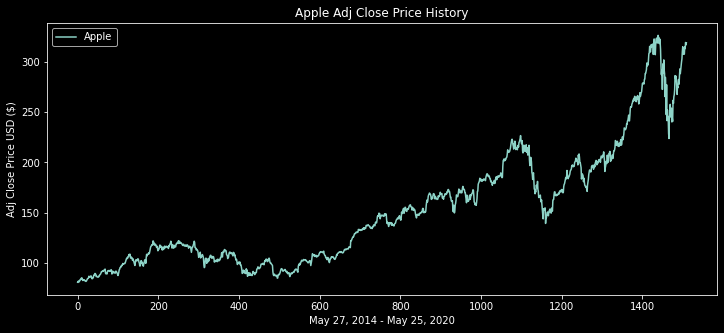

In [4]:
## visualization
plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close Price'], label = 'Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel('May 27, 2014 - May 25, 2020')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [5]:
## a simple moving average with 30 day

sma30 = pd.DataFrame()
sma30['Adj Close Price'] = apple['Adj Close Price'].rolling(window=30).mean()
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,287.864806
1506,289.577426
1507,291.594106
1508,293.310716


In [6]:
## a simple moving average with 100 day

sma100 = pd.DataFrame()
sma100['Adj Close Price'] = apple['Adj Close Price'].rolling(window=100).mean()
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,289.734840
1506,290.037927
1507,290.345799
1508,290.630966


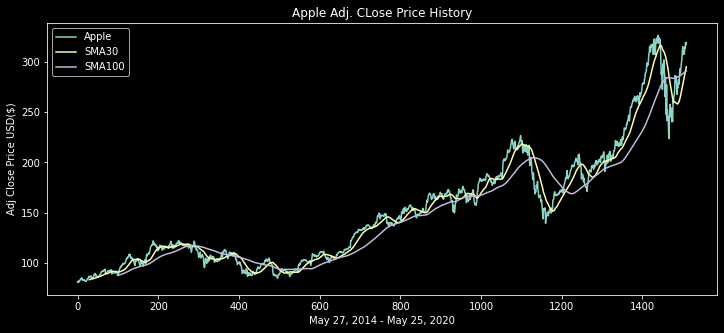

In [8]:
## now that visualization

plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close Price'], label = 'Apple')
plt.plot(sma30['Adj Close Price'], label = 'SMA30')
plt.plot(sma100['Adj Close Price'], label = 'SMA100' )
plt.title("Apple Adj. CLose Price History")
plt.xlabel('May 27, 2014 - May 25, 2020')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
## new data frame to store
data =pd.DataFrame()
data['apple'] = apple['Adj Close Price']
data['SMA30'] = sma30['Adj Close Price']
data['SMA100'] = sma100['Adj Close Price']
data

,apple,SMA30,SMA100
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


In [14]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [15]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
# To show the data
data

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


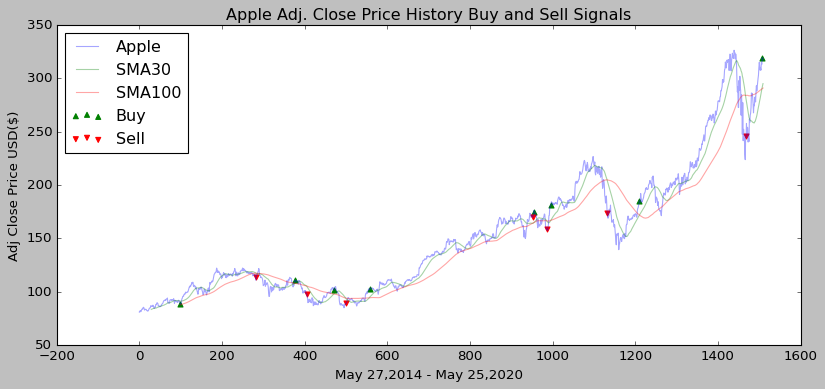

In [16]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data['apple'], label='Apple', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 27,2014 - May 25,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()